In [1]:
import numpy as np

# Hendrik Hansen-Goos and Roland Roth 2006 J. Phys.: Condens. Matter 18 8413
# https://arxiv.org/abs/cond-mat/0606658v2

# obtained from eq (24) from Roth article

# βσR^3
def mt_p_term(eta):
    return 3.0 * eta / (4 * np.pi) * (1 + eta + eta ** 2 - eta ** 3) / (1 - eta) ** 3


# βσR^2
def mt_sigma_term(eta):
    return (
        3
        * eta
        / (4 * np.pi)
        * (
            (1 + 2 * eta + 8 * eta ** 2 - 5 * eta ** 3) / (3 * (1 - eta) ** 3)
            + (np.log(1 - eta) / (3 * eta))
        )
    )


# βKR
def mt_K_term(eta):
    return (
        3.0
        * eta
        / (4.0 * np.pi)
        * (
            (4.0 - 10.0 * eta + 20.0 * eta ** 2 - 8. * eta ** 3)
            / (3 * (1.0 - eta) ** 3)
            + (4.0 * np.log(1.0 - eta)) / (3.0 * eta)
        )
    )


In [2]:
from scipy.optimize import newton
from eos.ISCT import ISCT

def get_terms(eta, eos, T0, **kwargs):
    R = eos.R[0]
    v = eos.v(0)
    rho = eta / v

    def func(T):
        return eos.density_baryon(T, 0.0) - rho

    T = newton(func, T0, **kwargs)

    p, Sigma, K = eos.p_eq(T, 0, format="full")
    print(T, eta, p, Sigma, K)
    return (
        p*R**3/T,
        Sigma * R ** 2 / T,
        K*R/T
    )


def get_term_data(eos, x1=1e-3, x2=0.5, num=20, T0=200., **kwargs):
    data = {
        'eta':np.linspace(x1, x2, num),
        'p_term':[],
        'sigma_term':[],
        'K_term':[]
    }

    for eta in data['eta']:
        try:
            terms = get_terms(eta, eos, T0, **kwargs)
            data['p_term'].append(terms[0])
            data['sigma_term'].append(terms[1])
            data['K_term'].append(terms[2])
        except:
            data['eta'] = data['eta'][:len(data['sigma_term'])]
            break

    return data

In [3]:
isct = ISCT(
    R=[0.39],
    g=[4.0],
    Alpha=[1.07],
    Beta=[3.76],
    A=[1.14/2.],
    B=[1.52/2.],
)
# remove excluded volume modification
isct.f_stitched = lambda *x: 1.0

isct2 = ISCT(
    Alpha = [1.14],
    Beta = [3.37],
    A = [0.69] ,
    B = [1.0 - 0.69],
)
isct2.f_stitched = lambda *x: 1.0

In [4]:
isct_data = get_term_data(isct, tol=1e-6)

43.26785075359957 0.001 0.17500169095866322 0.03889819685907424 0.020100358156752256
139.8791307424699 0.027263157894736843 17.410850552600007 3.8561825477820286 1.7010681625614699
191.0341202447661 0.053526315789473686 52.14376712186102 11.498584714033703 4.383734426553089
239.1889184997562 0.07978947368421052 108.32801242522295 23.763336646082035 7.903274127393603
290.4149074926097 0.10605263157894737 194.67547553576696 42.43846254200625 12.391249313341369
348.7823685949814 0.13231578947368422 325.7334918749088 70.4790887374752 18.137514259205254
418.76414962422706 0.15857894736842104 525.6657302080673 112.72189532072913 25.621064555414993
506.4081819710461 0.1848421052631579 835.3981659430341 177.21444537614892 35.603519236556004
620.6631201428254 0.21110526315789474 1326.0328084660537 277.65159835696886 49.30226793359172
775.3963236927717 0.2373684210526316 2124.399512755376 437.8865882071736 68.69511176189995
992.7323047321863 0.26363157894736844 3462.4921734606746 700.38039937704

d:\Users\nsyak\Desktop\Speed_of_Sound\eos\ISCT.py:138: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  np.inf,


5628.025804216516 0.39494736842105266 59125.11959996244 10291.102566307498 793.9233453328159
8916.352245521719 0.4212105263157895 113897.10537454761 19029.95599136419 1325.2644140012937
14712.227851061178 0.4474736842105263 226586.42184753827 36230.899735922256 2291.4787432977364
25342.326186977898 0.4737368421052632 466972.2231160213 71259.57815557547 4116.785471021917
45614.22593327361 0.5 998927.8216676973 145092.8100480986 7697.347805598004


In [5]:
isct2_data = get_term_data(isct2, T0=320., tol=1e-6, maxiter=100)

42.193004019348216 0.001 0.15801909919234675 0.04360058711301825 0.007818190774479502
134.62186200242465 0.027263157894736843 15.292518656429625 4.183971317194105 0.7063427741462729
182.83007487049264 0.053526315789473686 45.498413054111445 12.321585207038257 1.9500939326927171
228.71743572451734 0.07978947368421052 94.9410666958629 25.397352894306696 3.7536328622484114
278.3121214687998 0.10605263157894737 172.27522037407334 45.413412044893334 6.246499478896655
335.4972534259089 0.13231578947368422 291.31738276180585 75.47023791305742 9.63359361546887
404.2014535570213 0.15857894736842104 473.62372263240536 120.22154337946512 14.21173076445741
489.1584503705591 0.1848421052631579 752.6227223740349 186.576952701668 20.401078552846382
596.4614196272125 0.21110526315789474 1179.982034463329 284.7266679849144 28.79143912553395
734.1886581498027 0.2373684210526316 1835.4346227905448 429.6441556987358 40.20964771375563
913.2661147967862 0.26363157894736844 2842.1901848227135 643.34661910315

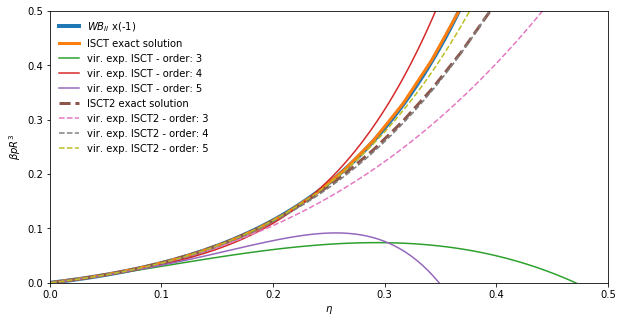

In [12]:
# p term plots

import matplotlib.pyplot as plt
%matplotlib inline

eta_data = np.linspace(1e-3, 0.5, 100)

fig = plt.figure(figsize=(10, 5))

plt.plot(
    eta_data,
    mt_p_term(eta_data),
    label="$WB_{II}$ x(-1)",
    linewidth=4,
)

plt.plot(
    isct_data["eta"], isct_data["p_term"], label="ISCT exact solution", linewidth=3
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct.R[0] ** 3 * isct.virial_expansion_p(eta / isct.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT - order: {order}",
    )

plt.plot(
    isct2_data["eta"],
    isct2_data["p_term"],
    label="ISCT2 exact solution",
    linestyle="--",
    linewidth=3,
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct2.R[0] ** 3
            * isct2.virial_expansion_p(eta / isct2.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT2 - order: {order}",
        linestyle="--",
    )


plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.xlabel("$\eta$")
plt.ylabel("$\\beta p R^3$")

plt.legend(frameon=False)
# plt.savefig('visualization/plots/p_morph_therm_VS_ISCT.pdf')
plt.show()


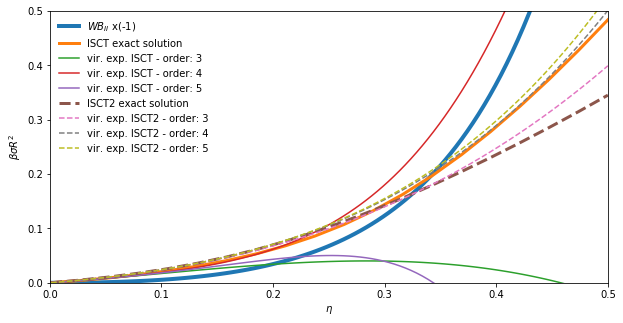

In [13]:
# Sigma term plots

import matplotlib.pyplot as plt

eta_data = np.linspace(1e-3, 0.5, 100)

plt.figure(figsize=(10, 5))

plt.plot(
    eta_data,
    mt_sigma_term(eta_data),
    label="$WB_{II}$ x(-1)",
    linewidth=4,
)

plt.plot(
    isct_data["eta"], isct_data["sigma_term"], label="ISCT exact solution", linewidth=3
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct.R[0] ** 2 * isct.virial_expansion_Sigma(eta / isct.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT - order: {order}",
    )

plt.plot(
    isct2_data["eta"],
    isct2_data["sigma_term"],
    label="ISCT2 exact solution",
    linestyle="--",
    linewidth=3,
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct2.R[0] ** 2
            * isct2.virial_expansion_Sigma(eta / isct2.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT2 - order: {order}",
        linestyle="--",
    )


plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

plt.xlabel("$\eta$")
plt.ylabel("$\\beta \sigma R^2$")

plt.legend(frameon=False)
# plt.savefig('visualization/plots/Sigma_morph_therm_VS_ISCT.pdf')
plt.show()


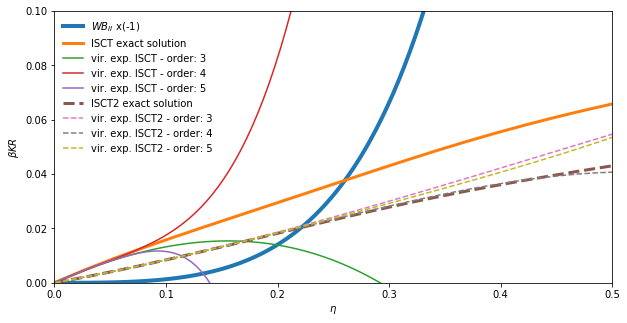

In [15]:
# K term plots

import matplotlib.pyplot as plt

eta_data = np.linspace(1e-3, 0.5, 100)

plt.figure(figsize=(10, 5))

plt.plot(
    eta_data,
    mt_K_term(eta_data),
    label="$WB_{II}$ x(-1)",
    linewidth=4,
)

plt.plot(
    isct_data["eta"], isct_data["K_term"], label="ISCT exact solution", linewidth=3
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct.R[0] * isct.virial_expansion_K(eta / isct.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT - order: {order}",
    )

plt.plot(
    isct2_data["eta"],
    isct2_data["K_term"],
    label="ISCT2 exact solution",
    linestyle="--",
    linewidth=3,
)

for order in [3, 4, 5]:
    plt.plot(
        eta_data,
        [
            isct2.R[0]
            * isct2.virial_expansion_K(eta / isct2.v(0), order=order)
            for eta in eta_data
        ],
        label=f"vir. exp. ISCT2 - order: {order}",
        linestyle="--",
    )


plt.xlim(0, 0.5)
plt.ylim(0, 0.1)

plt.xlabel("$\eta$")
plt.ylabel("$\\beta K R$")

plt.legend(frameon=False)
# plt.savefig('visualization/plots/K_morph_therm_VS_ISCT.pdf')
plt.show()